In [18]:
# Importing Library
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [19]:
# Set job title as variable for customizations
job_title = "Machine Learning Engineer"

# Set top skills as variable for customizations
top_skills = 7

# Check the datafrome df.
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [20]:
# Create a copy and filtered the dataframe to the "Data Analyst" job_title only.
df_DA = df[df['job_title_short'] == job_title].copy()

# Creating the new column "Job_posted_month_no" in the dataframe "df_DA"
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Chech the newly created column.
df_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
23,Machine Learning Engineer,"PhD position in computer science (NLP, finance)",Russia,via hh.ru,Full-time,False,Russia,2023-09-30 13:52:00,False,False,Russia,None,NaN,NaN,Грешнев Олег Владимирович,"[python, r]","{'programming': ['python', 'r']}",9
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,"[python, sql, pytorch, pandas]","{'libraries': ['pytorch', 'pandas'], 'programm...",8
85,Machine Learning Engineer,Machine Learning Engineer/Scientist High Perfo...,Anywhere,via LinkedIn,Full-time,True,Canada,2023-11-21 13:13:33,False,False,Canada,None,NaN,NaN,Haiper,"[python, pytorch]","{'libraries': ['pytorch'], 'programming': ['py...",11
209,Machine Learning Engineer,Lead Data Scientist/ Lead Machine Learning Eng...,"Vancouver, BC, Canada",via LinkedIn,Full-time,False,Canada,2023-02-02 13:16:17,False,False,Canada,None,NaN,NaN,Agoda,"[sql, python, scala, pyspark]","{'libraries': ['pyspark'], 'programming': ['sq...",2
255,Machine Learning Engineer,Machine Learning Engineer,"Abuja, Nigeria",via LinkedIn Nigeria,Full-time,False,Nigeria,2023-11-08 13:50:20,False,False,Nigeria,None,NaN,NaN,UNICCON Group of Companies,"[python, c++, pytorch, tensorflow, nltk, docke...","{'libraries': ['pytorch', 'tensorflow', 'nltk'...",11


In [21]:
#Now, we explode the job_skills column.
df_DA = df_DA.explode('job_skills')

# Check the column
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
23,Machine Learning Engineer,"PhD position in computer science (NLP, finance)",Russia,via hh.ru,Full-time,False,Russia,2023-09-30 13:52:00,False,False,Russia,None,NaN,NaN,Грешнев Олег Владимирович,python,"{'programming': ['python', 'r']}",9
23,Machine Learning Engineer,"PhD position in computer science (NLP, finance)",Russia,via hh.ru,Full-time,False,Russia,2023-09-30 13:52:00,False,False,Russia,None,NaN,NaN,Грешнев Олег Владимирович,r,"{'programming': ['python', 'r']}",9
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,python,"{'libraries': ['pytorch', 'pandas'], 'programm...",8
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,sql,"{'libraries': ['pytorch', 'pandas'], 'programm...",8
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,pytorch,"{'libraries': ['pytorch', 'pandas'], 'programm...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,azure,"{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",6
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,tensorflow,"{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",6
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,pytorch,"{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",6
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,NaN,NaN,Digital Hub Warsaw At Bayer,terraform,"{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",6


In [22]:
# Now, we group the Datadrame by the month number and job_skills as the column.
df_DA_pivot = df_DA.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Now, we create total row at the end of the pivot table
# Which help us in sorting the pivot by the skills.
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

# Now, we sort the pivot table by the total of the skill in decending order.
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

# Now, we drop the row "Total".
df_DA_pivot = df_DA_pivot.drop('Total')
# Chech the pivot table
df_DA_pivot

job_skills,python,pytorch,tensorflow,aws,sql,azure,spark,docker,java,kubernetes,...,play framework,clickup,nuix,tidyr,nuxt.js,gatsby,blazor,powerbi,asp.net core,monday.com
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,975,417,431,394,365,236,319,274,198,237,...,0,0,0,0,0,0,0,0,0,0
2,723,334,318,264,288,176,230,218,172,175,...,1,0,0,0,1,0,0,0,0,0
3,770,349,348,295,288,224,246,205,201,196,...,0,1,0,1,0,0,0,0,0,1
4,675,315,307,253,273,203,213,203,180,179,...,0,0,0,0,0,0,0,0,0,0
5,619,282,284,245,215,178,191,190,177,154,...,0,0,0,0,0,0,0,0,0,0
6,774,363,350,306,285,231,234,212,206,161,...,0,0,0,0,0,0,0,0,0,0
7,790,369,355,328,289,218,220,228,187,202,...,0,0,0,0,0,0,0,0,0,0
8,913,397,390,345,333,274,225,234,232,212,...,0,0,0,0,0,0,1,1,0,0
9,827,369,352,310,271,241,213,231,200,197,...,0,0,1,0,0,0,0,0,0,0


In [23]:
# Now, we reset the index to create a new column using the 'job_posted_month_no'.
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot

job_skills,job_posted_month_no,python,pytorch,tensorflow,aws,sql,azure,spark,docker,java,...,play framework,clickup,nuix,tidyr,nuxt.js,gatsby,blazor,powerbi,asp.net core,monday.com
0,1,975,417,431,394,365,236,319,274,198,...,0,0,0,0,0,0,0,0,0,0
1,2,723,334,318,264,288,176,230,218,172,...,1,0,0,0,1,0,0,0,0,0
2,3,770,349,348,295,288,224,246,205,201,...,0,1,0,1,0,0,0,0,0,1
3,4,675,315,307,253,273,203,213,203,180,...,0,0,0,0,0,0,0,0,0,0
4,5,619,282,284,245,215,178,191,190,177,...,0,0,0,0,0,0,0,0,0,0
5,6,774,363,350,306,285,231,234,212,206,...,0,0,0,0,0,0,0,0,0,0
6,7,790,369,355,328,289,218,220,228,187,...,0,0,0,0,0,0,0,0,0,0
7,8,913,397,390,345,333,274,225,234,232,...,0,0,0,0,0,0,1,1,0,0
8,9,827,369,352,310,271,241,213,231,200,...,0,0,1,0,0,0,0,0,0,0
9,10,927,433,409,347,324,262,226,237,207,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Now,we create a new column called 'Job_posted_month' in the pivot table.
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

# Here, we set the index of the pivot table to newly created column 'job_posted_month'.
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')

# Drop the column "job_posted_month_no" from the pivot table
# This column has no use.
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Chech the newly-made changes in the pivot table.
df_DA_pivot

job_skills,python,pytorch,tensorflow,aws,sql,azure,spark,docker,java,kubernetes,...,play framework,clickup,nuix,tidyr,nuxt.js,gatsby,blazor,powerbi,asp.net core,monday.com
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,975,417,431,394,365,236,319,274,198,237,...,0,0,0,0,0,0,0,0,0,0
Feb,723,334,318,264,288,176,230,218,172,175,...,1,0,0,0,1,0,0,0,0,0
Mar,770,349,348,295,288,224,246,205,201,196,...,0,1,0,1,0,0,0,0,0,1
Apr,675,315,307,253,273,203,213,203,180,179,...,0,0,0,0,0,0,0,0,0,0
May,619,282,284,245,215,178,191,190,177,154,...,0,0,0,0,0,0,0,0,0,0
Jun,774,363,350,306,285,231,234,212,206,161,...,0,0,0,0,0,0,0,0,0,0
Jul,790,369,355,328,289,218,220,228,187,202,...,0,0,0,0,0,0,0,0,0,0
Aug,913,397,390,345,333,274,225,234,232,212,...,0,0,0,0,0,0,1,1,0,0
Sep,827,369,352,310,271,241,213,231,200,197,...,0,0,1,0,0,0,0,0,0,0


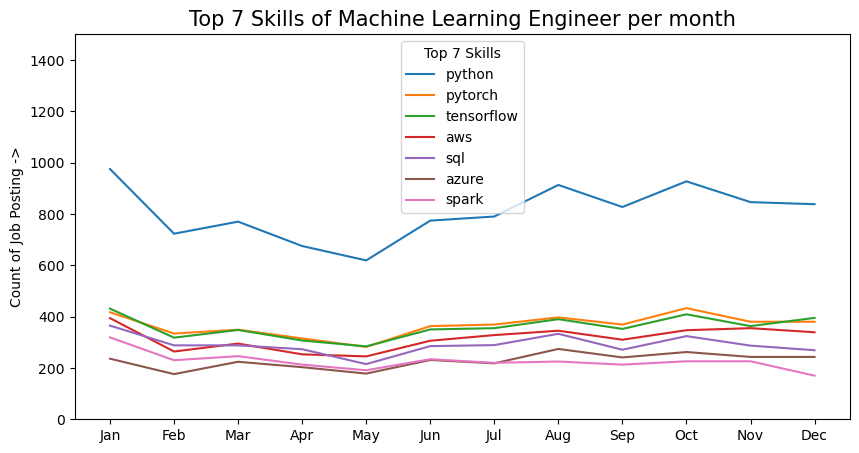

In [25]:
# Now. plot the pivot table in line graph.
df_DA_pivot.iloc[:, :top_skills].plot(kind='line', figsize=(10, 5))
plt.title(f"Top {top_skills} Skills of {job_title} per month", fontsize=15)
plt.xlabel("")
plt.ylabel("Count of Job Posting ->")
plt.legend().set_title(f"Top {top_skills} Skills")
plt.xticks(range(len(df_DA_pivot.index)), df_DA_pivot.index)
plt.ylim(0, 1500)
plt.show()

## Advance Customization

In [26]:
Job_title = 'Senior Data Analyst'

skills_num = 5

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [27]:
# Let's filter the dataframe with the Job Title.
df_SDA = df[df['job_title_short'] == Job_title].copy()

# Create a new column called "job_posted_month_no" in the newly created dataframe "df_SDA"
df_SDA['job_posted_month_no'] = df_SDA['job_posted_date'].dt.month

# Check the newlt created dataframe
df_SDA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,[sql],{'programming': ['sql']},6
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"[sql, python]","{'programming': ['sql', 'python']}",5
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None,11
106,Senior Data Analyst,Senior Data Analyst (1541),Israel,via LinkedIn,Full-time,False,Israel,2023-07-13 13:27:00,True,False,Israel,None,NaN,NaN,TCM Technologies LTD,[python],{'programming': ['python']},7
150,Senior Data Analyst,Senior Consultant Data & Analytics,Belgium,via LinkedIn,Full-time,False,Belgium,2023-12-09 13:44:56,False,False,Belgium,None,NaN,NaN,EY,[excel],{'analyst_tools': ['excel']},12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785417,Senior Data Analyst,Senior Statistical Data Analyst,"Bogotá, Bogota, Colombia","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-27 06:23:40,True,False,Colombia,None,NaN,NaN,Inchcape Digital,"[python, r]","{'programming': ['python', 'r']}",9
785542,Senior Data Analyst,Senior Data Analyst (Hybrid),"Owings Mills, MD",via LinkedIn,Full-time,False,"New York, United States",2023-01-26 06:00:25,False,False,United States,None,NaN,NaN,CareFirst BlueCross BlueShield,"[sql, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']...",1
785592,Senior Data Analyst,VP - Institutional Credit Management - Lending...,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:53,True,False,Poland,None,NaN,NaN,Citi,None,None,1
785625,Senior Data Analyst,Senior Data Analyst,"Fort Lauderdale, FL",via Trabajo.org,Full-time,False,"Florida, United States",2023-01-21 06:20:14,False,True,United States,None,NaN,NaN,The Farmer's Dog,"[excel, sheets]","{'analyst_tools': ['excel', 'sheets']}",1


In [28]:
# Let's exlode the job skills column
df_SDA = df_SDA.explode('job_skills')

# Check the exploded dataframe
df_SDA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,sql,{'programming': ['sql']},6
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,sql,"{'programming': ['sql', 'python']}",5
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,python,"{'programming': ['sql', 'python']}",5
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None,11
106,Senior Data Analyst,Senior Data Analyst (1541),Israel,via LinkedIn,Full-time,False,Israel,2023-07-13 13:27:00,True,False,Israel,None,NaN,NaN,TCM Technologies LTD,python,{'programming': ['python']},7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785625,Senior Data Analyst,Senior Data Analyst,"Fort Lauderdale, FL",via Trabajo.org,Full-time,False,"Florida, United States",2023-01-21 06:20:14,False,True,United States,None,NaN,NaN,The Farmer's Dog,excel,"{'analyst_tools': ['excel', 'sheets']}",1
785625,Senior Data Analyst,Senior Data Analyst,"Fort Lauderdale, FL",via Trabajo.org,Full-time,False,"Florida, United States",2023-01-21 06:20:14,False,True,United States,None,NaN,NaN,The Farmer's Dog,sheets,"{'analyst_tools': ['excel', 'sheets']}",1
785632,Senior Data Analyst,Senior Data Analyst,Denmark,via BeBee,Full-time,False,Denmark,2023-01-13 07:16:05,True,False,Denmark,None,NaN,NaN,VELUX Group,sql,"{'programming': ['sql', 'r', 'python']}",1
785632,Senior Data Analyst,Senior Data Analyst,Denmark,via BeBee,Full-time,False,Denmark,2023-01-13 07:16:05,True,False,Denmark,None,NaN,NaN,VELUX Group,r,"{'programming': ['sql', 'r', 'python']}",1


In [29]:
# let's Create the pivot table of grouped by the job month with the columns of job skills.
df_SDA_pivot = df_SDA.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Let's create the row "Total" at the end of the pivot table
df_SDA_pivot.loc['Total'] = df_SDA_pivot.sum()

# Here, we sort the pivot table by the total of the skills in decending order.
df_SDA_pivot = df_SDA_pivot[df_SDA_pivot.loc['Total'].sort_values(ascending=False).index]

# now, we drop the row named 'Total' as it has no use anymore
df_SDA_pivot = df_SDA_pivot.drop('Total')

# Chech the changes in the pivot table
df_SDA_pivot

job_skills,sql,python,tableau,excel,r,power bi,sas,azure,powerpoint,aws,...,couchdb,elixir,drupal,sqlserver,apl,heroku,pascal,symfony,theano,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2251,1363,1276,1164,828,727,730,252,304,274,...,0,0,0,0,0,0,0,0,0,0
2,1754,993,965,845,570,533,646,218,274,214,...,0,0,0,0,1,0,0,0,0,1
3,1614,940,940,801,542,501,630,195,224,183,...,0,0,0,0,0,0,0,0,0,0
4,1458,857,805,687,493,455,566,160,198,183,...,0,0,0,0,0,0,0,0,0,0
5,1213,802,731,578,460,392,412,145,134,147,...,0,0,0,0,0,0,0,1,0,0
6,1422,926,863,711,519,472,448,207,198,157,...,0,0,0,0,0,0,1,0,0,0
7,1433,926,844,626,521,527,408,220,149,159,...,0,0,0,0,0,0,0,0,0,0
8,1782,1118,969,758,622,557,472,196,177,202,...,0,1,0,0,0,1,0,0,0,0
9,1203,773,659,579,416,500,308,175,128,147,...,0,0,0,1,0,0,0,0,0,0


In [30]:
# Vow, we reset the index of the pivot df_SDA_pivot.
df_SDA_pivot = df_SDA_pivot.reset_index()

# Check it
df_SDA_pivot

job_skills,job_posted_month_no,sql,python,tableau,excel,r,power bi,sas,azure,powerpoint,...,couchdb,elixir,drupal,sqlserver,apl,heroku,pascal,symfony,theano,centos
0,1,2251,1363,1276,1164,828,727,730,252,304,...,0,0,0,0,0,0,0,0,0,0
1,2,1754,993,965,845,570,533,646,218,274,...,0,0,0,0,1,0,0,0,0,1
2,3,1614,940,940,801,542,501,630,195,224,...,0,0,0,0,0,0,0,0,0,0
3,4,1458,857,805,687,493,455,566,160,198,...,0,0,0,0,0,0,0,0,0,0
4,5,1213,802,731,578,460,392,412,145,134,...,0,0,0,0,0,0,0,1,0,0
5,6,1422,926,863,711,519,472,448,207,198,...,0,0,0,0,0,0,1,0,0,0
6,7,1433,926,844,626,521,527,408,220,149,...,0,0,0,0,0,0,0,0,0,0
7,8,1782,1118,969,758,622,557,472,196,177,...,0,1,0,0,0,1,0,0,0,0
8,9,1203,773,659,579,416,500,308,175,128,...,0,0,0,1,0,0,0,0,0,0
9,10,1293,798,700,624,431,485,338,170,158,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Now, we create the new column called 'jon_posted_month' as it contain the abbreviations version of the job month name.
df_SDA_pivot['job_posted_month'] = df_SDA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

# Here, we set the pivot table index to the created column 'job_posted_month'.
df_SDA_pivot = df_SDA_pivot.set_index("job_posted_month")

# Drop the column 'job_posted_month_no' as it has no use anymore.
df_SDA_pivot = df_SDA_pivot.drop(columns='job_posted_month_no')

# Check the changes in the pivot table.
df_SDA_pivot

job_skills,sql,python,tableau,excel,r,power bi,sas,azure,powerpoint,aws,...,couchdb,elixir,drupal,sqlserver,apl,heroku,pascal,symfony,theano,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,2251,1363,1276,1164,828,727,730,252,304,274,...,0,0,0,0,0,0,0,0,0,0
Feb,1754,993,965,845,570,533,646,218,274,214,...,0,0,0,0,1,0,0,0,0,1
Mar,1614,940,940,801,542,501,630,195,224,183,...,0,0,0,0,0,0,0,0,0,0
Apr,1458,857,805,687,493,455,566,160,198,183,...,0,0,0,0,0,0,0,0,0,0
May,1213,802,731,578,460,392,412,145,134,147,...,0,0,0,0,0,0,0,1,0,0
Jun,1422,926,863,711,519,472,448,207,198,157,...,0,0,0,0,0,0,1,0,0,0
Jul,1433,926,844,626,521,527,408,220,149,159,...,0,0,0,0,0,0,0,0,0,0
Aug,1782,1118,969,758,622,557,472,196,177,202,...,0,1,0,0,0,1,0,0,0,0
Sep,1203,773,659,579,416,500,308,175,128,147,...,0,0,0,1,0,0,0,0,0,0


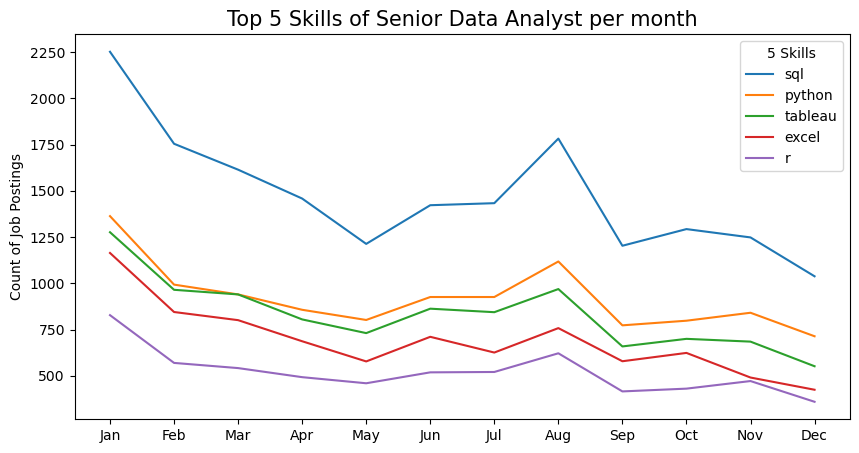

In [32]:
# now, we plot this pivot table into bar chart
df_SDA_pivot.iloc[:, :skills_num].plot(kind='line', figsize=(10, 5))
plt.title(f"Top {skills_num} Skills of {Job_title} per month", fontsize=15)
plt.xticks(range(len(df_SDA_pivot.index)), df_SDA_pivot.index)
plt.xlabel("")
plt.ylabel("Count of Job Postings")
plt.legend().set_title(f"{skills_num} Skills")
plt.show()

# Advace Customizations

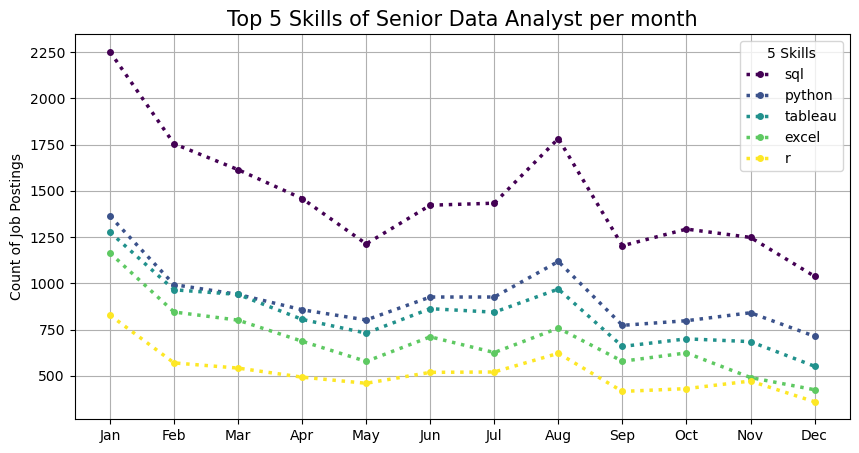

In [78]:
# now, we plot this pivot table into bar chart
df_SDA_pivot.iloc[:, :skills_num].plot(kind='line', 
                                       figsize=(10, 5),
                                       linewidth=2.5,
                                       linestyle=':',           # options: '-', '--', '-.', ':'
                                       colormap='viridis',      # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
                                       marker='o',              # options: 'o', 'x', '+', '*', 's' (square), ',', '.', '1', '2', '3', '4', ...
                                       markersize=4
                                       )
plt.title(f"Top {skills_num} Skills of {Job_title} per month", fontsize=15)
plt.xticks(range(len(df_SDA_pivot.index)), df_SDA_pivot.index)
plt.xlabel("")
plt.ylabel("Count of Job Postings")
plt.legend().set_title(f"{skills_num} Skills")
plt.grid(True)
plt.show()

# Customize the Scatter Plot

In [ ]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

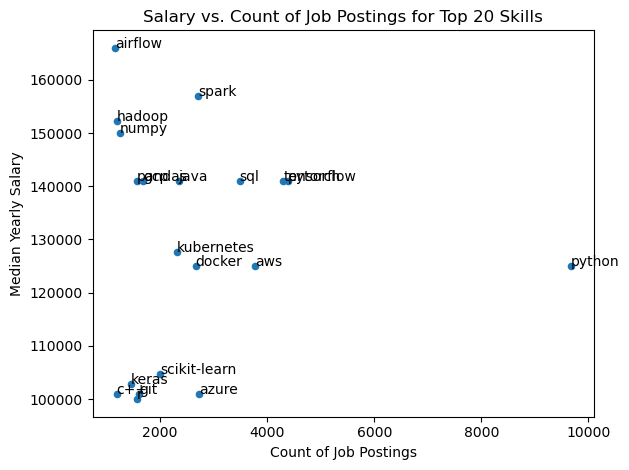

In [79]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

In [86]:
# Install the package "adjustText" in the terminal and then import the'adjust_text" from it.
from adjustText import adjust_text

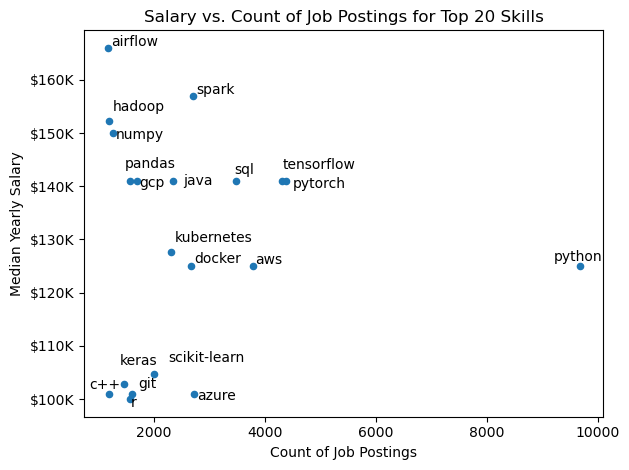

In [105]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowdrops=dict(arrowstyle='->', color='grey', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

# Notes Exercise

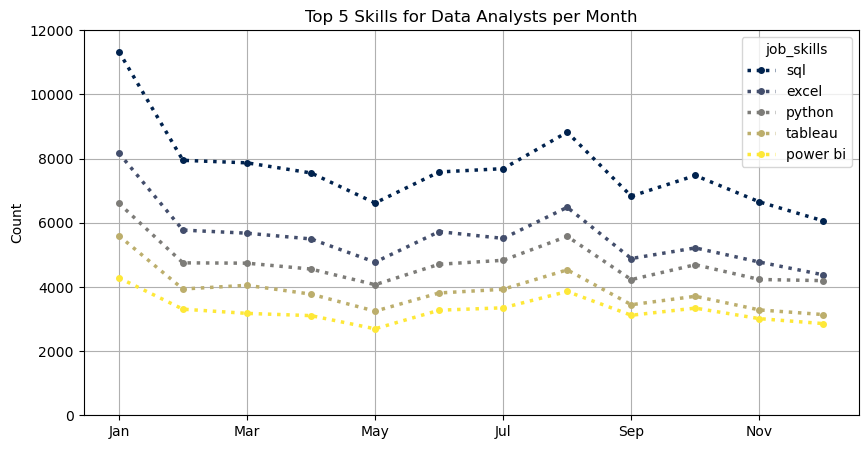

In [130]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=2.5,
    linestyle=':',
    colormap='cividis', 
    marker='o',
    markersize=4,
    figsize=(10, 5)
    )

plt.grid(True)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.ylim(0, 12_000)
plt.xlabel('')
plt.show()

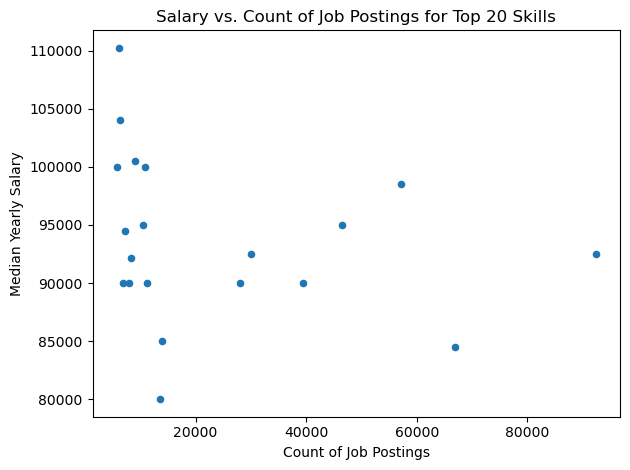

In [131]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

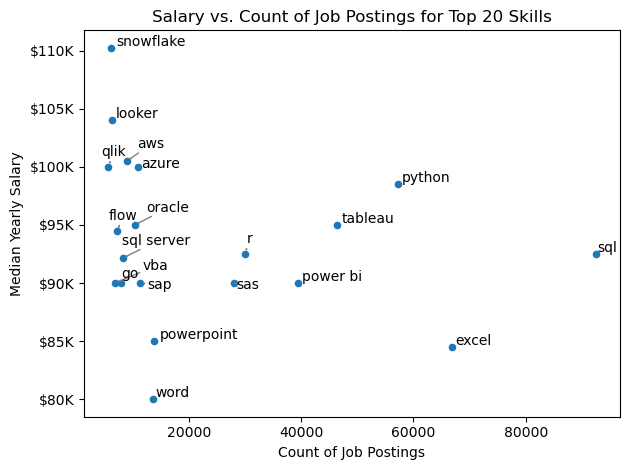

In [140]:


skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'), lw=1)

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

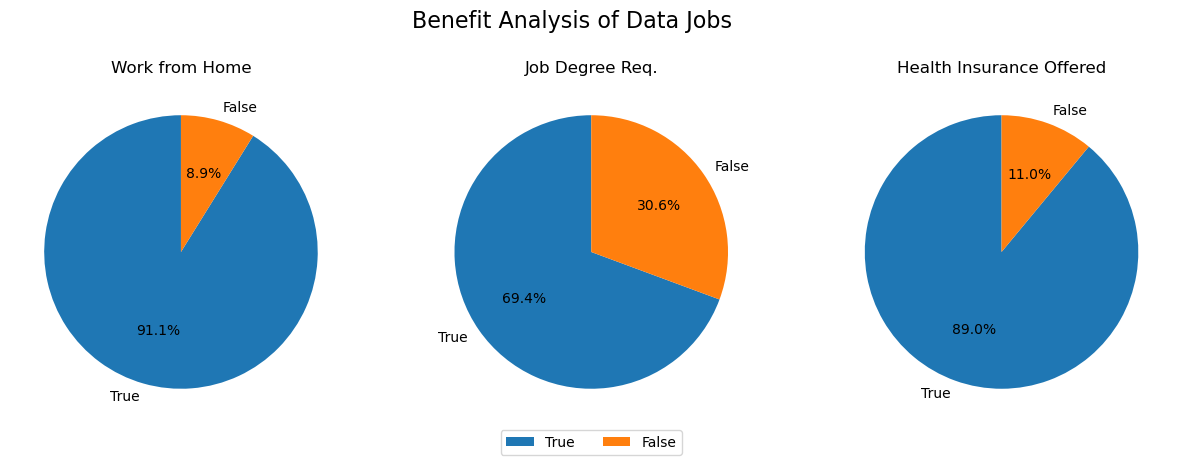

In [157]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['True', 'False'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.legend(loc='upper center' , bbox_to_anchor=(-0.7, 0), ncol=2)
plt.show()